#**Approach Description**

In this Notebook, I am trying to apply Abhishek Thakur's technique that he has mentioned in his article **"Approaching any ML problem"**

https://www.linkedin.com/pulse/approaching-almost-any-machine-learning-problem-abhishek-thakur/

#Loading data

In [ ]:
import pandas as pd

train = pd.read_csv('Train.csv')
train.head()

,L_Id,Date of Creation,Agent Category Assigned,Type of Request,Description of the Request,Location,Street Type,Region Type,Ward No,Estimated Date of Completion,Request Solution Category,Actual Date of Completion,Team Assigned,A_1,A_2,Problem Category
0,LM_1,18-12-2018 00:29,1,10,2,13,11223.0,0,7,18-12-2018 09:29,4,18-12-2018 05:34,45,1,1,1
1,LM_2,30-11-2018 22:19,1,15,17,13,10019.0,0,30,01-12-2018 07:19,8,01-12-2018 00:35,22,2,2,1
2,LM_3,12-12-2018 02:37,1,11,22,0,11237.0,2,7,12-12-2018 11:37,8,12-12-2018 04:29,17,1,1,1
3,LM_4,26-12-2018 01:45,1,11,22,12,11213.0,0,7,26-12-2018 10:45,7,26-12-2018 05:26,33,1,1,1
4,LM_5,24-12-2018 03:22,1,2,27,13,10460.0,0,6,24-12-2018 12:22,4,24-12-2018 10:20,24,0,0,1


#**Numerical Variables**

In [ ]:
train.dtypes

L_Id                             object
Date of Creation                 object
Agent Category Assigned           int64
Type of Request                   int64
Description of the Request        int64
Location                          int64
Street Type                     float64
Region Type                       int64
Ward No                           int64
Estimated Date of Completion     object
Request Solution Category         int64
Actual Date of Completion        object
Team Assigned                     int64
A_1                               int64
A_2                               int64
Problem Category                  int64
dtype: object

In [ ]:
train.select_dtypes(include=['int64','float64']).columns

Index(['Agent Category Assigned', 'Type of Request',
       'Description of the Request', 'Location', 'Street Type', 'Region Type',
       'Ward No', 'Request Solution Category', 'Team Assigned', 'A_1', 'A_2',
       'Problem Category'],
      dtype='object')

We will keep all Numeric features and remove all Other Columns

---



In [ ]:
train.drop(['L_Id', 'Date of Creation', 'Estimated Date of Completion', 'Actual Date of Completion'], axis=1, inplace=True)

In [ ]:
train.head()

,Agent Category Assigned,Type of Request,Description of the Request,Location,Street Type,Region Type,Ward No,Request Solution Category,Team Assigned,A_1,A_2,Problem Category
0,1,10,2,13,11223.0,0,7,4,45,1,1,1
1,1,15,17,13,10019.0,0,30,8,22,2,2,1
2,1,11,22,0,11237.0,2,7,8,17,1,1,1
3,1,11,22,12,11213.0,0,7,7,33,1,1,1
4,1,2,27,13,10460.0,0,6,4,24,0,0,1


In [ ]:
print('Agent Category Assigned : ', train['Agent Category Assigned'].unique())
print('Type of Request : ', train['Type of Request'].unique())
print('Description of the Request : ', train['Description of the Request'].unique())
print('Location : ', train['Location'].unique())
print('Street Type : ', train['Street Type'].unique())
print('Region Type : ', train['Region Type'].unique())
print('Ward No : ', train['Ward No'].unique())
print('Request Solution Category : ', train['Request Solution Category'].unique())
print('Team Assigned : ', train['Team Assigned'].unique())
print('A_1 : ', train.A_1.unique())
print('A_2 : ', train.A_2.unique())

Agent Category Assigned :  [1]
Type of Request :  [10 15 11  2 14 20  3  1  0 13  8 16  5 18 17 12 19  4  9]
Description of the Request :  [ 2 17 22 27 23 14 31 10 34 20 15  3 41 30  6  1 25 35 29 26  5  0 11 21
 28 19 37 40  7 12  8 39 36 38 24  4 32  9]
Location :  [13  0 12 10  7  9  6  3  5  8 16 14  1]
Street Type :  [11223. 10019. 11237. 11213. 10460. 11375. 10009. 11354. 11201. 11434.
 10314. 11235.    nan 10457. 11219. 10308. 10017. 10458. 11432. 10003.
 10462. 11214. 11204. 11228. 11411. 11356. 11102. 11226. 10312. 10026.
 10039. 10027. 11101. 10029. 11373. 11385. 10451. 11225. 11365. 11416.
 10466. 11211. 11206. 10034. 11216. 10002. 11229. 11232. 10016. 11218.
 11357. 10028. 11238. 10472. 11230. 11103. 11691. 10453. 11207. 11358.
 10461. 10001. 11368. 11694. 11355. 11209. 10032. 10023. 10465. 10040.
 11366. 11419. 11436. 11378. 10013. 11429. 10452. 11217. 11415. 11417.
 11367. 10302. 11105. 11414. 11208. 11418. 11224. 11220. 10065. 10468.
 11233. 11106. 10036. 11104. 11420. 1

In [ ]:
#train['Street Type'] = train['Street Type'].fillna(train['Street Type'].mean())

train['Street Type'] = train['Street Type'].fillna(train['Street Type'].mode()[0])

In [ ]:
train.isnull().sum()

Agent Category Assigned       0
Type of Request               0
Description of the Request    0
Location                      0
Street Type                   0
Region Type                   0
Ward No                       0
Request Solution Category     0
Team Assigned                 0
A_1                           0
A_2                           0
Problem Category              0
dtype: int64

#**Checking Dataset SkewNess**

In [ ]:
# Checking Problem Category wise Data frequency 
print('Problem Category frequency :')
print(train['Problem Category'].value_counts(normalize=True))
print(' ')
print('Problem Category count :')
print(train['Problem Category'].value_counts())

Problem Category frequency :
1    0.931977
2    0.046746
0    0.021277
Name: Problem Category, dtype: float64
 
Problem Category count :
1    6001
2     301
0     137
Name: Problem Category, dtype: int64


Dataset is highly skewed. 
I will go for technique to deal with imbalanced Dataset.

We have two options here : 
(1) UnderSampling
(2) OverSampling

Let's try Undersampling first : 

In [ ]:
# Problem Category count :
#1    6001
#2     301
#0     137

ProbCategory_0 = train.loc[train['Problem Category'] == 0]
ProbCategory_1 = train.loc[train['Problem Category'] == 1][:300]
ProbCategory_2 = train.loc[train['Problem Category'] == 2]

normal_distributed_df = pd.concat([ProbCategory_0, ProbCategory_1, ProbCategory_2])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Agent Category Assigned,Type of Request,Description of the Request,Location,Street Type,Region Type,Ward No,Request Solution Category,Team Assigned,A_1,A_2,Problem Category
170,1,15,5,13,10065.0,2,30,10,34,2,2,1
216,1,10,34,13,11691.0,2,14,4,55,3,3,1
100,1,2,31,13,10457.0,0,6,8,20,0,0,1
1638,1,13,22,7,11385.0,4,31,12,0,5,5,2
23,1,11,22,0,10003.0,0,30,7,8,2,2,1


In [ ]:
new_df.shape

(738, 12)

#**Correlation Matrix**

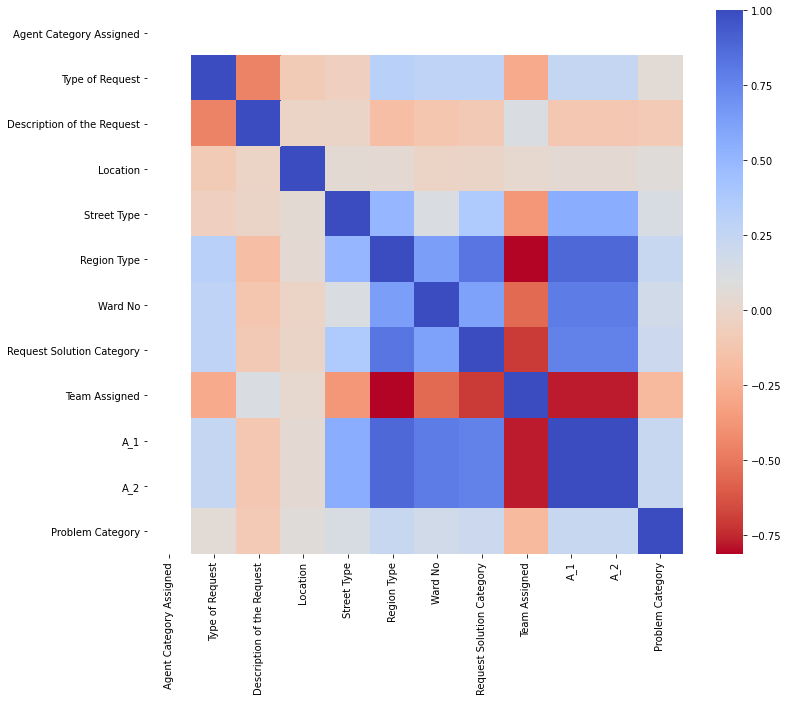

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.show()

# **Applying Classifiers**

In [ ]:
new_df_temp = new_df

# Splitting Independent and Dependent Variables
X = new_df_temp.loc[:, new_df_temp.columns != 'Problem Category'].values
y = new_df_temp['Problem Category'].values

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [ ]:
#No Point in applying Linear Classifier as Data is not Normalized

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.7945945945945946


In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#In an imbalanced classification problem with more than two classes, precision is 
#calculated as the sum of true positives across all classes divided by the sum of 
#true positives and false positives across all classes.

#When using the precision_score() function for multiclass classification, it is 
#important to specify the minority classes via the “labels” argument and to perform 
#set the “average” argument to ‘micro‘ to ensure the calculation is performed as we expect.
# calculate prediction
def multiclass_precision_score(y_test, y_pred, average="macro"):
  precision = precision_score(y_test, y_pred, labels=[0,2], average=average)
  return precision

#Recall is a metric that quantifies the number of correct positive predictions made 
#out of all positive predictions that could have been made.
# calculate recall
def multiclass_recall_score(y_test, y_pred, average='macro'):
  recall = recall_score(y_test, y_pred, average=average)
  return recall

In [ ]:
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

dtree_model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)   #Optimum Value for max_depth : 10
dtree_predictions = dtree_model.predict(X_test)

print('DecisionTreeClassifier + UnderSampling')
print('Precision: ', multiclass_recall_score(y_test, dtree_predictions))
print('Recall: ', multiclass_precision_score(y_test, dtree_predictions))

DecisionTreeClassifier + UnderSampling
Precision:  0.6666666666666666
Recall:  0.34545454545454546


In [ ]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
cm_df = pd.DataFrame(cm)
cm_df.style.background_gradient(cmap='coolwarm')

,0,1,2
0,0,0,34
1,0,75,0
2,0,0,76


In [ ]:
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)   
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)

print('RandomForestClassifier + UnderSampling')
print('Precision: ', multiclass_recall_score(y_test, rf_predictions))
print('Recall: ', multiclass_precision_score(y_test, rf_predictions))

RandomForestClassifier + UnderSampling
Precision:  0.6882800137598899
Recall:  0.6842948717948718


In [ ]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, rf_predictions)
cm_df = pd.DataFrame(cm)
cm_df.style.background_gradient(cmap='coolwarm')

,0,1,2
0,4,0,30
1,0,74,1
2,2,1,73


In [ ]:
xg_cl = xgb.XGBClassifier(objective= "multi:softprob", 
                          n_estimators=125, 
                          learning_rate=0.1, 
                          seed=123,
                          max_depth=2)

xg_cl.fit(X_train, y_train)

preds = xg_cl.predict(X_test)
        
#print('Accuracy : ', accuracy_score(y_test, preds))
#print('ROC for XGBClassifier : ', multiclass_roc_auc_score(y_test, preds))

print('XGBClassifier + UnderSampling')
print('Precision: ', multiclass_recall_score(y_test, preds))
print('Recall: ', multiclass_precision_score(y_test, preds))

XGBClassifier + UnderSampling
Precision:  0.6916924664602683
Recall:  0.7287735849056604


In [ ]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, preds)
cm_df = pd.DataFrame(cm)
cm_df.style.background_gradient(cmap='coolwarm')

,0,1,2
0,3,0,31
1,0,75,0
2,1,0,75


#**Implementing SMOTE**

In [ ]:
import pandas as pd
train_smote = pd.read_csv('Train.csv')

In [ ]:
train_smote.drop(['L_Id', 'Date of Creation', 'Estimated Date of Completion', 'Actual Date of Completion'], axis=1, inplace=True)

In [ ]:
train_smote['Street Type'] = train_smote['Street Type'].fillna(train_smote['Street Type'].mode()[0])
train_smote.isnull().sum()

# Checking Problem Category wise Data frequency 
print('Problem Category frequency :')
print(train_smote['Problem Category'].value_counts(normalize=True))
print(' ')
print('Problem Category count :')
print(train_smote['Problem Category'].value_counts())

Problem Category frequency :
1    0.931977
2    0.046746
0    0.021277
Name: Problem Category, dtype: float64
 
Problem Category count :
1    6001
2     301
0     137
Name: Problem Category, dtype: int64


In [ ]:
# Splitting Independent and Dependent Variables
X = train_smote.loc[:, train_smote.columns != 'Problem Category'].values
y = train_smote['Problem Category'].values

from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
x_sm, y_sm = smote.fit_sample(X_train, y_train)

print(X_train.shape)
print(x_sm.shape)

(4829, 11)
(9226, 11)


In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_sm, y_sm)

predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.9329192546583851


In [ ]:
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

dtree_model = DecisionTreeClassifier(max_depth=2).fit(x_sm, y_sm)   #Optimum Value for max_depth : 10
dtree_predictions_2 = dtree_model.predict(X_test)

#print('Accuracy : ', accuracy_score(y_test, dtree_predictions_2))
#print('ROC for DecisionTreeClassifier : ', multiclass_roc_auc_score(y_test, dtree_predictions_2))

print('DecisionTreeClassifier + SMOTE')
print('Precision: ', multiclass_recall_score(y_test, dtree_predictions_2))
print('Recall: ', multiclass_precision_score(y_test, dtree_predictions_2))

DecisionTreeClassifier + SMOTE
Precision:  0.6272289062193831
Recall:  0.1485148514851485


In [ ]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions_2)
cm_df = pd.DataFrame(cm)
cm_df.style.background_gradient(cmap='coolwarm')

,0,1,2
0,30,4,0
1,1,1500,0
2,70,5,0


In [ ]:
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)   
rf_clf.fit(x_sm, y_sm)
rf_predictions_2 = rf_clf.predict(X_test)
    
#print('Accuracy : ', accuracy_score(y_test, rf_predictions_2))
#print('ROC for RandomForestClassifier : ', multiclass_roc_auc_score(y_test, rf_predictions_2))

print('RandomForestClassifier + SMOTE')
print('Precision: ', multiclass_recall_score(y_test, rf_predictions_2))
print('Recall: ', multiclass_precision_score(y_test, rf_predictions_2))

RandomForestClassifier + SMOTE
Precision:  0.6816993464052287
Recall:  0.6177033492822966


In [ ]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, rf_predictions_2)
cm_df = pd.DataFrame(cm)
cm_df.style.background_gradient(cmap='coolwarm')

,0,1,2
0,31,2,1
1,0,1501,0
2,64,1,10


In [ ]:
#XGB Classifier
xg_cl = xgb.XGBClassifier(objective= "multi:softprob", 
                                  n_estimators=5500, 
                                  learning_rate=0.1, 
                                  seed=123,
                                  max_depth=2)

xg_cl.fit(x_sm, y_sm)

preds_5000_2 = xg_cl.predict(X_test)
        
#print('Accuracy : ', accuracy_score(y_test, preds_5000_2))
#print('ROC for XGBClassifier(5000) : ', multiclass_roc_auc_score(y_test, preds_5000_2))

print('XGBClassifier(5000) + SMOTE')
print('Precision: ', multiclass_recall_score(y_test, preds_5000_2))
print('Recall: ', multiclass_precision_score(y_test, preds_5000_2))

XGBClassifier(5000) + SMOTE
Precision:  0.7057516339869281
Recall:  0.6302083333333333


In [ ]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, rf_predictions_2)
cm_df = pd.DataFrame(cm)
cm_df.style.background_gradient(cmap='coolwarm')

,0,1,2
0,31,2,1
1,0,1501,0
2,64,1,10


In [ ]:
result = pd.DataFrame(preds)

#**Precision vs. Recall for Imbalanced Classification**
You may decide to use precision or recall on your imbalanced classification problem. </br>

Maximizing precision will minimize the number false positives, whereas maximizing the recall will minimize the number of false negatives. </br>

Precision: Appropriate when minimizing false positives is the focus. </br>
Recall: Appropriate when minimizing false negatives is the focus. </br>